# Bonus

🎯 You are a Data Scientist for a bank. You are asked to develop a model that is able to detect at least 90% of fraudulent transactions. Go!

👇 Load the player `creditcard.csv` dataset and display its first 5 rows.

In [1]:
import pandas as pd

data = pd.read_csv("data/creditcard.csv")

data.head(10)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-6.677212,5.529299,-7.193275,6.081321,-1.636071,0.500610,-4.640770,-4.339840,-0.950036,0.566680,...,5.563301,-1.608272,0.965322,0.163718,0.047531,0.466165,0.278547,1.471988,105.89,1
1,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,-3.232153,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
2,-4.446847,-0.014793,-5.126307,6.945130,5.269255,-4.297177,-2.591242,0.342671,-3.880663,-3.976525,...,0.247913,-0.049586,-0.226017,-0.401236,0.856124,0.661272,0.492560,0.971834,1.00,1
3,-1.309441,1.786495,-1.371070,1.214335,-0.336642,-1.390120,-1.709109,0.667748,-1.699809,-3.843911,...,0.533521,-0.022180,-0.299556,-0.226416,0.364360,-0.475102,0.571426,0.293426,1.00,1
4,0.206075,1.387360,-1.045287,4.228686,-1.647549,-0.180897,-2.943678,0.859156,-1.181743,-3.096504,...,0.469199,0.344930,-0.203799,0.376640,0.715485,0.226003,0.628545,0.319918,0.76,1
5,-0.734303,0.435519,-0.530866,-0.471120,0.643214,0.713832,-1.234572,-2.551412,-2.057724,0.166831,...,-1.004877,1.150354,-0.152555,-1.386745,0.004716,0.219146,-0.058257,0.158048,29.95,1
6,-21.885434,12.930505,-24.098872,6.203314,-16.466099,-4.459842,-16.519836,14.535565,-3.897022,-8.650758,...,1.762232,-1.579055,-0.951043,0.134565,1.507110,-0.222671,1.527655,0.453699,99.99,1
7,-17.467710,10.114816,-24.202142,11.805469,-10.198046,-2.579938,-17.656788,2.256902,-6.242149,-12.830657,...,-2.328024,0.940830,1.296817,-1.055104,0.111792,0.679695,2.093541,-1.425491,1.00,1
8,-2.326922,-3.348439,-3.513408,3.175060,-2.815137,-0.203363,-0.892144,0.333226,-0.802005,-4.350685,...,1.226648,-0.695902,-1.478490,-0.061553,0.236155,0.531911,0.302324,0.536375,1389.56,1
9,-2.019001,1.491270,0.005222,0.817253,0.973252,-0.639268,-0.974073,-3.146929,-0.003159,-0.121653,...,2.839596,-1.185443,-0.142812,-0.086103,-0.329113,0.523601,0.626283,0.152440,0.76,1


ℹ️ Due to confidentiality issues, the original features have been preprocessed and renamed `V1` to `V28`. There is only one features which has not been transformed, `Amount` which is the transaction Amount. `Class` is the target and it takes value 1 in case of fraud and 0 otherwise.

# Base Logistic Regression

👇 Check class balance.

In [2]:
data.Class.value_counts()

0    28432
1       49
Name: Class, dtype: int64

/Users/bingobango/.pyenv/versions/3.10.6/envs/tom/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

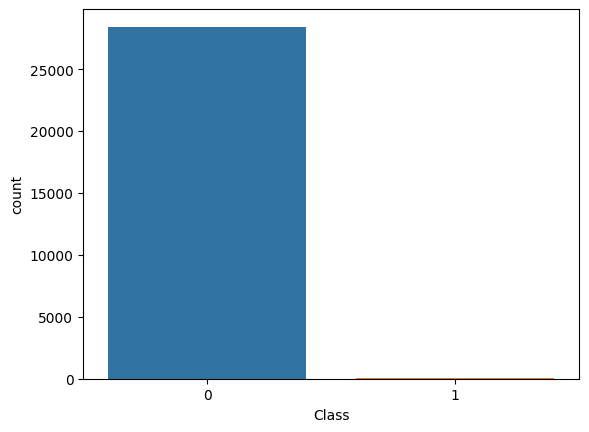

In [5]:
import seaborn as sns
sns.countplot(data.Class)

👇 Evaluate a base `LogisticRegression` for Recall. Use model parameter `class_weight = 'balanced'` to ensure it deals with class imbalance.

In [2]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler

# Ready X and y
X = data.loc[:, 'V1':'Amount']
y = data['Class']

scaler = RobustScaler()

X_scaled = scaler.fit_transform(X)


# 10-Fold Cross validate model
log_cv_results = cross_validate(LogisticRegression(max_iter=1000, class_weight = 'balanced' ), X_scaled, y, cv=10, 
                            scoring=['recall'])

log_cv_results['test_recall'].mean()

0.8800000000000001

ℹ️ A default Logistic Regression model can't guarantee a 90% recall. Its decision threshold needs to be adjusted to reach such a score.

# Threshold adjustment

In [3]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve

# Predict probabilities
y_pred_probas_0, y_pred_probas_1 = cross_val_predict(LogisticRegression(max_iter=1000,class_weight = 'balanced'),
                                                     X_scaled,y,
                                                     method = "predict_proba").T

# Generate precision and thresholds (and recalls) using probabilities for class 1
precision, recall, thresholds = precision_recall_curve(y, y_pred_probas_1)

# Populate dataframe with precision and threshold
df_recall = pd.DataFrame({"recall" : recall[:-1], "threshold" : thresholds})

# Find out which threshold guarantees a recall of 0.95
new_threshold = df_recall[df_recall['recall'] >= 0.9]['threshold'].max()

new_threshold

0.0005352642047617083